## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datas
#https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

Micestudy= pd.merge(mouse_metadata, study_results, on="Mouse ID")
Micestudy

# Display the data table for preview
print(Micestudy)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [28]:
# Checking the number of mice.
total_mice = Micestudy['Mouse ID'].nunique()
pd.DataFrame({"Total Mice": [total_mice]})

,Total Mice
0,249


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based
#-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicateRowsDF = Micestudy[Micestudy.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.youtube.com/watch?v=ix9iGffOA5U
CleanMiceStudy_df =Micestudy.drop_duplicates(subset =["Mouse ID","Timepoint"])
CleanMiceStudy_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
total_mice = CleanMiceStudy_df["Mouse ID"].nunique()
pd.DataFrame({"Total Mice": [total_mice]})


,Total Mice
0,249


## Summary Statistics

In [62]:
#change annoying column name

CleanMiceStudy_df.rename(columns ={"Tumor Volume (mm3)":"Tumor_Volume"}, inplace=True)
CleanMiceStudy_df

CleanMiceStudy_df.head()




# This method is the most straighforward, creating multiple series and putting them all together at the end.



C:\Users\quali\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [115]:
#Finding each regimen to group by
eachregimen_df=CleanMiceStudy_df.groupby(["Drug Regimen","Tumor_Volume"]).nunique()
print(eachregimen_df)

                           Mouse ID  Drug Regimen  Sex  Age_months  \
Drug Regimen Tumor_Volume                                            
Capomulin    23.343598            1             1    1           1   
             25.472143            1             1    1           1   
             28.167397            1             1    1           1   
             28.328531            1             1    1           1   
             28.430964            1             1    1           1   
...                             ...           ...  ...         ...   
Zoniferol    68.498639            1             1    1           1   
             68.611061            1             1    1           1   
             70.827796            1             1    1           1   
             71.108118            1             1    1           1   
             73.324432            1             1    1           1   

                           Weight (g)  Timepoint  Tumor_Volume  \
Drug Regimen Tumor_Volu

In [111]:
# Generate a summary statistics table of tumor volume for each drug regimen - mean

average_tumorvolume = CleanMiceStudy_df.groupby(["Drug Regimen"]).mean()["Tumor_Volume"]

print(average_tumorvolume)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_Volume, dtype: float64


In [112]:
# Generate a summary statistics table of median of tumor volume for each regimen
median_tumorvolume = CleanMiceStudy_df.groupby(["Drug Regimen"]).median()["Tumor_Volume"]
print(median_tumorvolume)

# This method produces everything in a single groupby function


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_Volume, dtype: float64


In [144]:
#Generate a summary statistics table of variance of the tumor volume for each regimen
variance =CleanMiceStudy_df.groupby(["Drug Regimen"]).var()["Tumor_Volume"]
print(variance)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor_Volume, dtype: float64


In [145]:
#Generate a summary statistics table of standard deviation of the tumor volume for each regimen
#https://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
standard_deviation = CleanMiceStudy_df.groupby(["Drug Regimen"]).std()["Tumor_Volume"]
print(standard_deviation)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor_Volume, dtype: float64


In [146]:
#Generate a summary statistics table of SEM of the tumor volume for each regimen
SEM_tumorvolume=CleanMiceStudy_df.groupby(["Drug Regimen"]).sem()["Tumor_Volume"]
print(SEM_tumorvolume)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor_Volume, dtype: float64


In [155]:
#Generate a summary statistics table of all above stats for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#df.pivot_table(index='', values='', aggfunc='')
Summary_Statistics_df = pd.DataFrame({"Average Tumor Volume":average_tumorvolume,
    "Median":median_tumorvolume,
    "Variance": variance,
    "SEM":SEM_tumorvolume,
    "Standard Deviation": standard_deviation})
Summary_Statistics_df[["Average Tumor Volume", "Median", "Variance", "SEM", "Standard Deviation"]]

,Average Tumor Volume,Median,Variance,SEM,Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.393463,50.909965,43.138803,0.525862,6.568014
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


## Bar and Pie Charts

In [175]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot`
#that shows  the number of total mice for each treatment regimen throughout the course of the study.
totalmice_per_regimen = CleanMiceStudy_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

                                   
print(totalmice_per_regimen)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


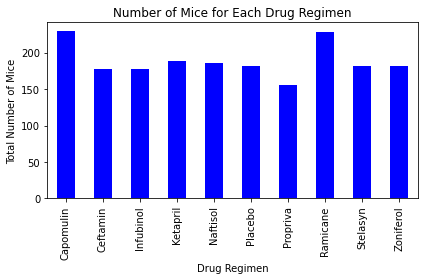

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#first is Pandas' DataFrame.plot()
DrugRegimen_chart =  totalmice_per_regimen.plot(kind='bar', title="Number of Mice for Each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
DrugRegimen_chart.set_xlabel("Drug Regimen")
DrugRegimen_chart.set_ylabel("Total Number of Mice")

plt.tight_layout()


plt.savefig("DrugRegimen Chart.png")
plt.show()









ValueError: shape mismatch: objects cannot be broadcast to a single shape

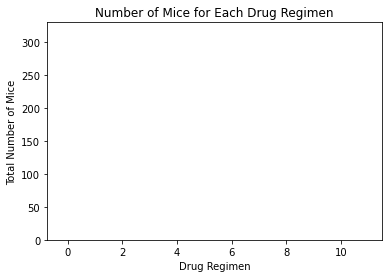

In [185]:
#next chart is bar plot using Matplotlibs' 'pyplot'
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
x_axis = np.arange(0, len("Drug Regimen"))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Mice for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

plt.xlim(-0.75, len("Drug Regimen")-.5)
plt.ylim(0, max(totalmice_per_regimen) + 100)

plt.bar(x_axis, totalmice_per_regimen, facecolor="blue", alpha=0.5, align="center")
plt.xticks(tick_locations, "Drug Regimen")
plt.show()

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas:
# Create a DF for Sex and count
gender_group = CleanMiceStudy_df.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()


#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows 
#the distribution of female or male mice in the study.



,Sex
Sex,
Female,930
Male,958


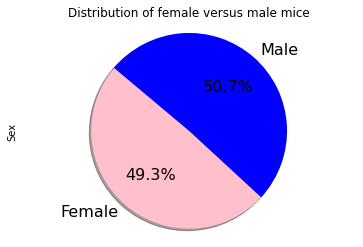

In [106]:
#Generate a pie plot using both Pandas's `DataFrame.plot() that shows 
#the distribution of female or male mice in the study.

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["pink","blue"],legend =False)

plt.axis("equal")
plt.savefig("Gender Chart.png")
plt.show()


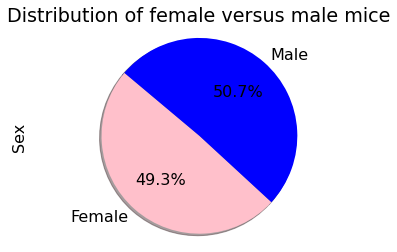

In [108]:
#and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.
#https://towardsdatascience.com/creating-a-basic-pie-chart-using-matplotlib-16dd3bf540b6
# Labels from index values from groupby df
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']
colors = ["pink", "blue"]

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Pyplot Gender Distribution.png")
plt.show()

In [160]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#'Capomulin','Ceftamin','Infubinol','Ramicane'

#Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint_df = CleanMiceStudy_df.groupby("Mouse ID").max()["Timepoint"]
print(last_greatest_timepoint)


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64


In [122]:
# Groupby 'Mouse ID' for most promising treatements
thetumor_df= Drugs.groupby(['Drug Regimen','Mouse ID']).agg(\

# Get the last value of the 'Tumor Volume using a lambda function selecting the element in -1 position
#https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
Last_tumor_size=('Tumor_Volume',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
thetumor_df.head(10)

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
             i557               47.686
             i738               37.312
             j119               38.125
             j246               38.753
             l509               41.483

In [52]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all 

#four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
#https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/
df_unstacked = df_stacked.unstack() 
print(df_unstacked.head(10)) 

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.htmlast_

NameError: name 'df_stacked' is not defined

## Quartiles, Outliers and Boxplots

In [129]:

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Put treatments into a list for for loop (and later for plot labels)
# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for Drug in Drugs_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

NameError: name 'Drugs_list' is not defined

In [ ]:
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fedcb074400>, <matplotlib.lines.Line2D object at 0x7fedcb074fa0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fedcc2155e0>, <matplotlib.lines.Line2D object at 0x7fedcc215a60>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fedcb074340>], 'medians': [<matplotlib.lines.Line2D object at 0x7fedcc215910>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fedcc2153d0>], 'means': []}

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
    

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
